#### Libraries

In [80]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np

#### DataFrame

In [81]:
df = pd.read_csv('Affairs.csv')

In [82]:
print(df)

     Unnamed: 0  affairs  gender   age  yearsmarried children  religiousness  \
0             4        0    male  37.0         10.00       no              3   
1             5        0  female  27.0          4.00       no              4   
2            11        0  female  32.0         15.00      yes              1   
3            16        0    male  57.0         15.00      yes              5   
4            23        0    male  22.0          0.75       no              2   
..          ...      ...     ...   ...           ...      ...            ...   
596        1938        1    male  22.0          1.50      yes              1   
597        1941        7  female  32.0         10.00      yes              2   
598        1954        2    male  32.0         10.00      yes              2   
599        1959        2    male  22.0          7.00      yes              3   
600        9010        1  female  32.0         15.00      yes              3   

     education  occupation  rating  
0 

#### Columns

In [83]:
print(df.columns)

Index(['Unnamed: 0', 'affairs', 'gender', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'],
      dtype='object')


#### Summary

In [84]:
print(df.drop(['Unnamed: 0'], axis=1).describe())

          affairs         age  yearsmarried  religiousness   education  \
count  601.000000  601.000000    601.000000     601.000000  601.000000   
mean     1.455907   32.487521      8.177696       3.116473   16.166389   
std      3.298758    9.288762      5.571303       1.167509    2.402555   
min      0.000000   17.500000      0.125000       1.000000    9.000000   
25%      0.000000   27.000000      4.000000       2.000000   14.000000   
50%      0.000000   32.000000      7.000000       3.000000   16.000000   
75%      0.000000   37.000000     15.000000       4.000000   18.000000   
max     12.000000   57.000000     15.000000       5.000000   20.000000   

       occupation      rating  
count  601.000000  601.000000  
mean     4.194676    3.931780  
std      1.819443    1.103179  
min      1.000000    1.000000  
25%      3.000000    3.000000  
50%      5.000000    4.000000  
75%      6.000000    5.000000  
max      7.000000    5.000000  


#### Missing Values

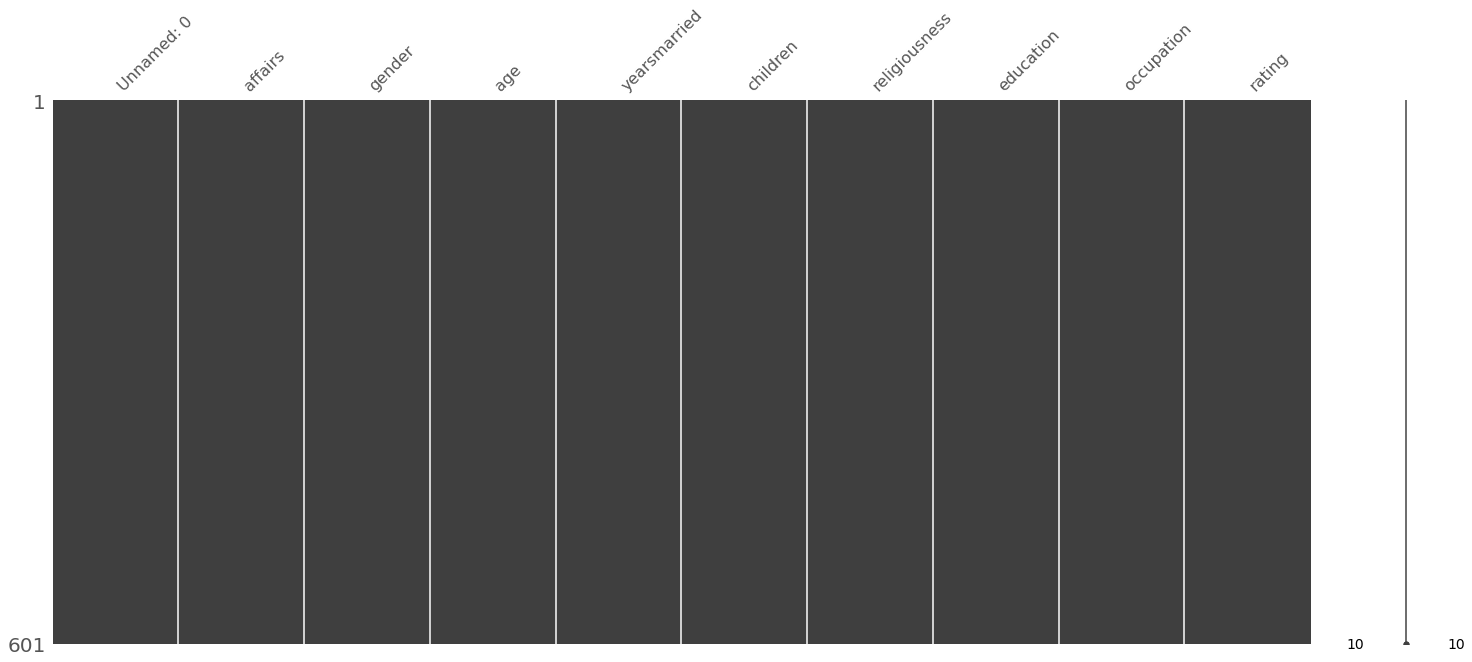

In [85]:
msno.matrix(df)
plt.show()

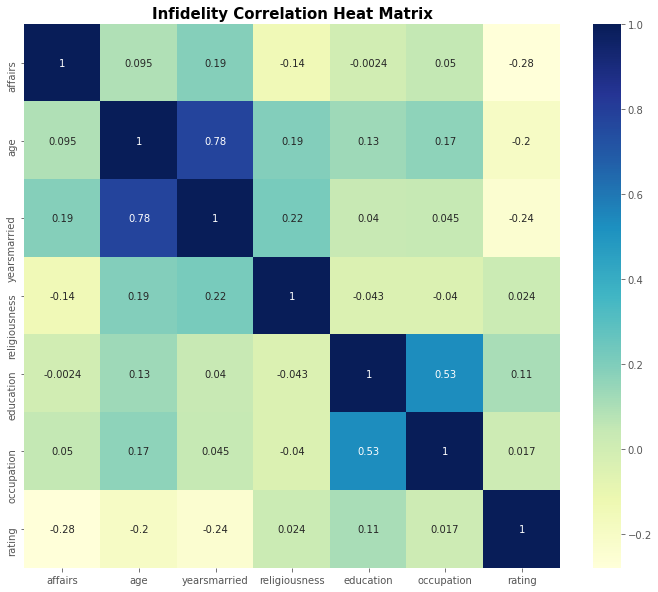

In [86]:
df_sex = df.drop(['gender', 'children', 'Unnamed: 0'], axis=1)
corrMatrix = df_sex.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu')
plt.title('Infidelity Correlation Heat Matrix', fontsize=15, color = 'black', fontweight='bold')
plt.show()

#### Affair by Sex

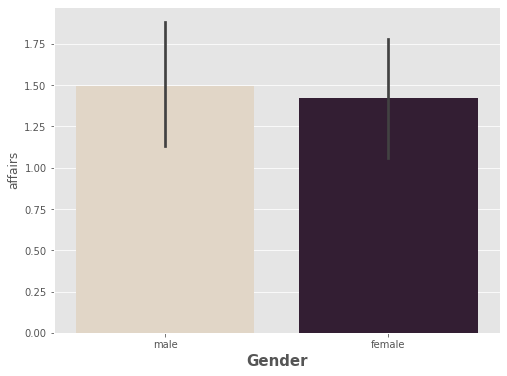

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='affairs', palette='ch:.25', data=df)
plt.xlabel('Gender', fontsize=15, fontweight='bold')
plt.show()

In [88]:
df1 = df.drop(['Unnamed: 0', 'age', 'yearsmarried', 'children',
       'religiousness', 'education', 'occupation', 'rating'], axis=1)


sexes = df1.groupby('gender')
females = sexes.get_group('female')
males = sexes.get_group('male')

#### Male Affair Frequency

In [89]:
print(males['affairs'].value_counts().sort_values(ascending=False))
print('\n')
print(males.describe())

0     208
7      20
1      19
12     18
3      11
2      10
Name: affairs, dtype: int64


          affairs
count  286.000000
mean     1.496503
std      3.292467
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max     12.000000


#### Female Affair Frequency

In [90]:
print(females['affairs'].value_counts().sort_values(ascending=False))
print('\n')
print(females.describe())

0     243
7      22
12     20
1      15
3       8
2       7
Name: affairs, dtype: int64


          affairs
count  315.000000
mean     1.419048
std      3.309264
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max     12.000000


#### Plotting Affair Frequency by Sex

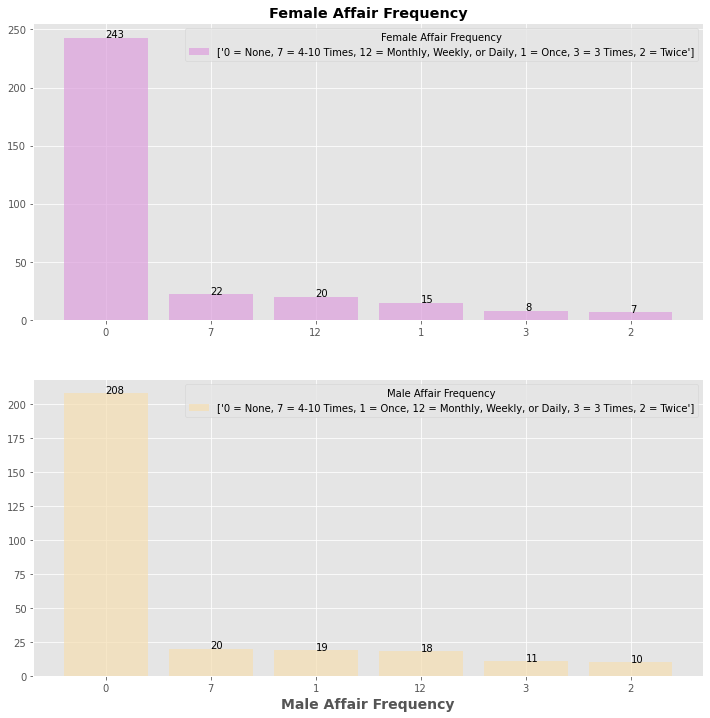

In [91]:

female_affair_freq=['0 = None, 7 = 4-10 Times, 12 = Monthly, Weekly, or Daily, 1 = Once, 3 = 3 Times, 2 = Twice']

male_affair_freq=['0 = None, 7 = 4-10 Times, 1 = Once, 12 = Monthly, Weekly, or Daily, 3 = 3 Times, 2 = Twice']


plt.figure(figsize=(12,12))
plt.subplot(2,1,1)

a = pd.Series(['0', '7', '12', '1', '3', '2'])
b = [243,22,20,15,8,7]
aa = a.astype('category')

plt.bar(aa, b, color = 'plum', fill='black', alpha=0.7, label=female_affair_freq)
plt.title('Female Affair Frequency', fontweight='bold')
plt.legend(fontsize='medium', title='Female Affair Frequency')
for h, j in enumerate(b):
    plt.text(aa[h], j, str(j))

plt.subplot(2,1,2)
c = pd.Series(['0','7','1','12','3','2'])
d = [208,20,19,18,11,10]
cc = c.astype('category')

plt.bar(cc, d, color='wheat', fill='black', alpha=0.7, label=male_affair_freq)
plt.xlabel('Male Affair Frequency', fontsize= 14, fontweight='bold')
plt.legend(fontsize='medium',title='Male Affair Frequency')
for i, v in enumerate(d):
    plt.text(cc[i], v, str(v))
plt.show()

#### Predictors and Target

In [92]:
y = df['affairs']
X = df[['yearsmarried','religiousness', 'rating']]

### Upsampling and Split Validation

In [93]:
ros = RandomOverSampler(random_state=1)
x_ros, y_ros = ros.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(x_ros,y_ros,test_size=0.3, random_state=10, shuffle=True)

## Model
#### Multinomial Logistic Regression with k-fold Cross Validation

In [94]:
standardizer = StandardScaler()
logit = LogisticRegression(penalty='l2', solver='newton-cg', multi_class = 'multinomial',n_jobs=-1)
pipeline = make_pipeline(standardizer, logit)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline,
                             x_ros,
                             y_ros,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1)
print('KFold Multinomial Logistic Model Accuracy: ', cv_results.mean()*100, '%', end=' ')
print('std: ', cv_results.std()*100, '+/-')

KFold Multinomial Logistic Model Accuracy:  31.92756594232609 % std:  2.9372653665091133 +/-


#### MNLogit Regression Results

In [95]:
log_model = sm.MNLogit(y_ros, x_ros).fit()

print(log_model.summary())

Optimization terminated successfully.
         Current function value: 1.678516
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                affairs   No. Observations:                 2706
Model:                        MNLogit   Df Residuals:                     2691
Method:                           MLE   Df Model:                           10
Date:                Mon, 22 Feb 2021   Pseudo R-squ.:                 0.06320
Time:                        21:53:40   Log-Likelihood:                -4542.1
converged:                       True   LL-Null:                       -4848.5
Covariance Type:            nonrobust   LLR p-value:                3.068e-125
    affairs=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
yearsmarried     -0.0483      0.014     -3.569      0.000      -0.075      -0.022
religiousness     0.

### Split Validation Accuracy

In [96]:
logit.fit(x_train,y_train)
print('\n')
print('Accuracy with Split Validation: ', logit.score(x_test,y_test)*100, '%')



Accuracy with Split Validation:  33.004926108374384 %


## Precision and Recall Score

In [97]:
y_predict = logit.predict(x_test)
print('Precision Score: ', precision_score(y_test, y_predict, average='micro')*100, '%')
print('Recall Score: ', recall_score(y_test, y_predict, average='micro')*100, '%')

Precision Score:  33.004926108374384 %
Recall Score:  33.004926108374384 %


## Attributes of Prediction Model

### Yearsmarried

<Figure size 864x720 with 0 Axes>

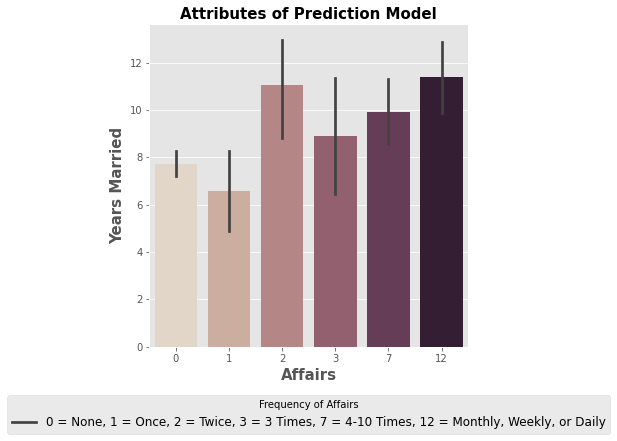

In [98]:
affair_freq=['0 = None, 1 = Once, 2 = Twice, 3 = 3 Times, 7 = 4-10 Times, '
             '12 = Monthly, Weekly, or Daily']

plt.figure(figsize=(12,10))
sns.catplot(x='affairs', y='yearsmarried', kind='bar', palette='ch:.25', data=df)
plt.xlabel('Affairs', fontsize=15, fontweight='bold')
plt.ylabel('Years Married', fontsize=15, fontweight='bold')
plt.title('Attributes of Prediction Model', fontsize=15, fontweight='bold')
plt.legend(affair_freq, bbox_to_anchor=(0.5, -0.29),fontsize='large',loc='lower center', title='Frequency of Affairs')
plt.show()

### Religiousness

<Figure size 864x720 with 0 Axes>

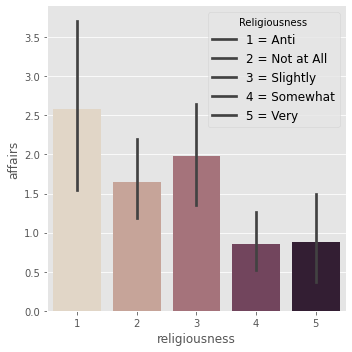

In [99]:
labels=['1 = Anti','2 = Not at All','3 = Slightly','4 = Somewhat','5 = Very']
plt.figure(figsize=(12,10))
sns.catplot(x='religiousness', y='affairs', kind='bar', palette='ch:.25', data=df)
plt.legend(labels,fontsize='large',title='Religiousness')
plt.tight_layout()
plt.show()

#### Happiness Rating and Number of Affairs

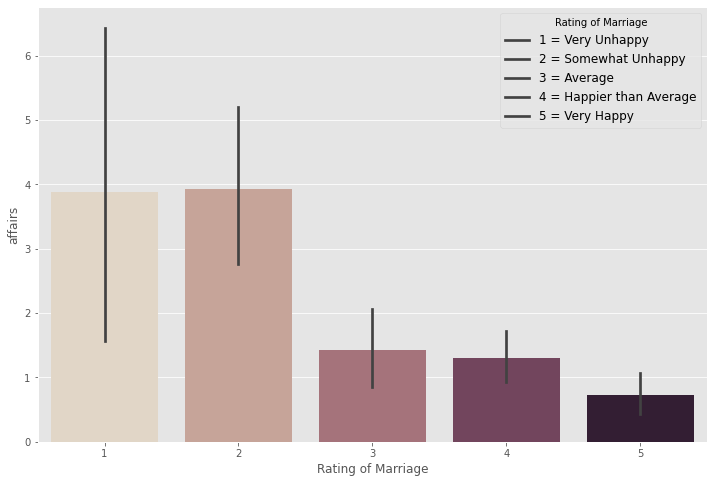

In [100]:
labels=['1 = Very Unhappy','2 = Somewhat Unhappy','3 = Average','4 = Happier than Average','5 = Very Happy']

plt.figure(figsize=(12,8))
sns.barplot(x='rating', y='affairs', data=df, palette='ch:.25')
plt.xlabel('Rating of Marriage')
plt.legend(labels,fontsize='large',title='Rating of Marriage')
plt.show()